## Домашнє завдання 7: Статистичний аналіз даних

0.Зчитайте дані з `data.csv` та запишіть значення колонки data у форматі np.ndarray в змінну data. Ми будемо далі працювати з цією змінною.

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from scipy.stats import norm, t, sem, chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest

In [14]:
data = pd.read_csv('drive/MyDrive/Python for Data Analysis/data/data.csv')['data'].values
data

array([17.49945292, 19.66239904,  7.18282343, 29.84162485,  9.23938649,
       14.94951581, 23.0172885 , 12.52827148, 13.65228669, 14.54595431,
       23.30872427, 33.75324808, 20.24923636, 13.29244733, 23.23434992,
       16.4230418 , 19.88521702, 27.05000732, 15.5127743 , 20.05415151,
       14.73135264, 19.06139498, 21.53942271, 14.06732571, 17.9670682 ,
       18.58289581, 16.17406993, 12.87432628, 11.47269664, 19.07902883,
       18.38565824, 33.38820073,  5.39139454, 20.67635903, 22.22266722,
       28.15780318, 23.01114324, 14.93471778, 20.00005857, 23.25411543,
       18.11895082, 24.62607043,  8.79145607, 30.387108  , 28.80606806,
       17.98593597, 23.66804468, 20.28782355, 15.02518827, 20.52626131,
       26.00219532, 17.71344489, 17.74598346, 19.55317542, 22.60097798,
       27.67027538, 16.19192417, 23.05037746, 21.29669604,  8.84832568,
       17.48410111, 19.20602661, 19.76257856, 21.9560206 ,  7.75806171,
       20.27753314, 15.93394654, 11.36336584, 23.14577858, 24.41

In [15]:
type(data)

numpy.ndarray

Запустіть код нижче. Для коректної робити всіх подальших методів дані мають бути у вигляді одновимірного вектора, тобто мати розмір (100,).

In [16]:
data.shape

(100,)

## Перевірка вибірки на нормальність

1.**Візуалізація розподілу**

Подивимось спершу на розподіл наших даних. Для цього побудуємо розподіл даних (графік на вигляд як гістограма, тільки він нормований так, аби сума під кривою була рівна 1), а на нього накладемо лінійний графік щільності (PDF) нормального розподілу з середнім та стандартним відхиленням як у наших даних.
Цей варіант візуалізації швидший та простіший, ніж той, що наводився у лекції коли ми будували кілька кривих щільності для одних і тих самих даних. Побудуйте графік як наведено в очікуваному результаті та напишіть ваш висновок, чи схоже, що дані розподілені нормально?

Підказка: весь графік будується за 6 рядків коду, три з яких - підписи осей і графіку. Аби побудувати лінійний графік функції щільності та він наклався на гістограму, необхідно задати значення іксів з діапазону значень наших даних. Ці значення вже задані для вас, залишилось дописати 5 рядочків коду :)

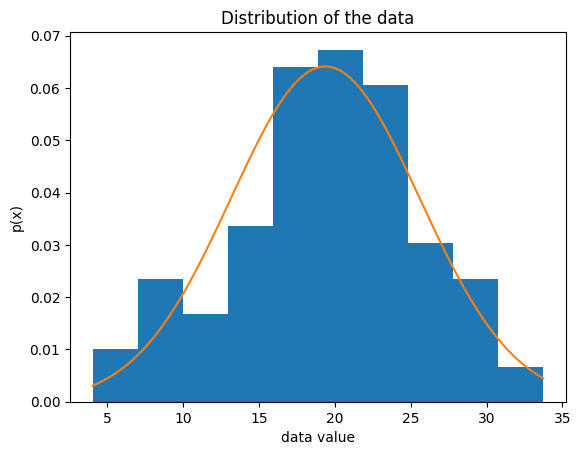

In [37]:
x_axis = np.arange(data.min(), data.max(), 0.01)

plt.hist(data, density=True)
plt.plot(x_axis, norm.pdf(x_axis, data.mean(), data.std()))

plt.xlabel('data value')
plt.ylabel('p(x)')
plt.title('Distribution of the data');

2.**QQ графік**

Ще одним візуалізаційним методом перевірки розподілу вибірки даних на нормальність є графік квантиль-квантиль, Q-Q графік або QQ графік.

Цей графік генерує власну вибірку (sample) ідеалізованого розподілу, з яким ми порівнюємо наші дані, у цьому випадку розподіл Гауса. Дані ідеалізованої вибірки поділяються на групи (наприклад, 5), які називаються квантилями. Кожна точка наших даних поєднується з подібним членом з ідеалізованого розподілу.

Отримані точки будуються як діаграма розсіювання з ідеалізованим значенням на осі абсцис (х) і вибіркою даних на осі ординат (у).

Якщо наша вибірка даних ідеально збігається з ідеалізованою, то це буде виглядати на графіку як лінія точок під кутом 45 градусів від нижнього лівого кута графіка до верхнього правого. Часто на графіку малюють додаткову лінію, щоб допомогти зрозуміти це очікування. Відхилення крапок від лінії очікувань (ідеального варіанту) показує відхилення наших даних від очікуваного розподілу.

Ми можемо розробити діаграму QQ в Python за допомогою функції [statsmodels qqplot()](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html). Функція бере вибірку даних і за замовчуванням припускає, що ми порівнюємо її з розподілом Гауса. Ми можемо намалювати стандартизовану лінію, встановивши для аргументу `line` значення `s`.

**Ваша задача тут**: вивести qq графік з допомогою зазначеного методу та написати висновок, чи розподіл є нормальним згідно з цим графіку.
Як інтерпретувати QQ графіки - наведено на картинці нижче.

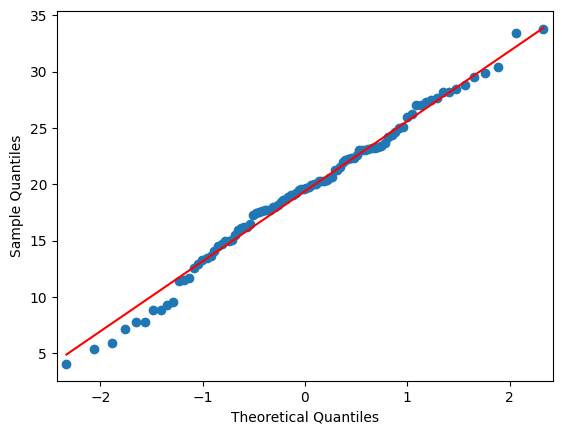

In [43]:
qqplot(data, line='s')
plt.show()

Розподіл подібний до нормального, хоча QQ тест показує, що у нас більше даних на менших значеннях, ніж має бути в нормальному розподілі.

3.**Тест Шапіро-Вілка**

Тест Шапіро-Вілка визначає для вибірки, наскільки ймовірно, що вона була витягнута з нормального розподілу.
Нульова гіпотеза H0 тесту Шапіро-Вилка полягає в тому, що випадкова величина, вибірка якої відома, розподілена за нормальним законом. Альтернативна гіпотеза H1 полягає в тому, що закон розподілу **не** є нормальним.

**Задача**: протестувати нашу вибірку на нормальність з допомогою тета Шапіро-Вілка, реалізованого в функцію [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). Висновок зробіть на основі аналізу p-значення. На рівні значущості = 0.05 чи можемо ми відхилити гіпотезу Н0? Відповідь можна надати текстом, або написати простий if-else блок для виведення висновку спираючись на отримане p-значення. Нагадування:
- p <= alpha: відхиляємо H0.
- p > alpha: не можемо відхилити H0.

Також пропоную вам переглянути оце [відео](https://youtu.be/eh9eYLBecWk), тут розказується про QQ графік, тест Шапіро, та звʼязок між ними.


In [49]:
scipy.stats.shapiro(data).statistic

0.988785982131958

p > alpha => не можемо відхилити H0, отже, випадкова величина розподілена за нормальним законом.

## Z-test

4.Уявіть, що наші дані - це сума покупок в доларах наших покупців на сайті протягом липня 2022 року.
До цього місяця, ми мали продажі в середньому на чек $20. Чи вийшло у нас статистично значущо **підвищити** середній чек за останній місяць? Виведіть p-значення статистичного тесту та зробіть висновок, чи ми маємо зараз статистично значущу різницю у розмірі середнього чеку.
**Підказка**: треба провести одновибірочний z-test.

In [53]:
z_test_score, p_value = ztest(data, value=20, alternative='larger')

if p_value < 0.05:
  print('Managed to increase an average check.')
else:
  print('Average check is not larger than previous one.')

Average check is not larger than previous one.


In [54]:
data.mean(), z_test_score, p_value

(19.37755319670441, -0.9953477389335053, 0.8402164165464012)

5.Пройшов час, і ми зібрали дані про продажі за серпень 2022 року, які зберігли у файл `data_2.csv`. Продажів було дещо більше, але чи змінився стат. значущо середній чек порівняно з липнем 2022? Перевірте це використовуючи ztest.
Виведіть p-значення статистичного тесту та зробіть висновок, чи ми маємо зараз статистично значущу різницю у розмірі середнього чека між двома місяцями.

**Підказка**: треба провести двовибірковий ztest з Н0 - що середні значення в липні та серпні 2022 року - однакові. Для кращого розуміння ситуації, можливо вам буде цікаво переглянути, які середні показники чеку були в кожен з місяців :) Порівняйте свій висновок з простого спостереження середніх значень і висновок статистичного тесту. Чи вони збігаються?

In [56]:
data_2 = pd.read_csv('drive/MyDrive/Python for Data Analysis/data/data_2.csv')['data'].values
data_2.mean()

19.37322276512519

In [59]:
z_test_score_1, p_value_1 = ztest(data, data_2, value=0)

if p_value_1 < 0.05:
  print('Managed to increase an average check.')
else:
  print('Average check is similar.')

Average check is similar.


In [62]:
z_test_score_1, p_value_1

(0.005246673456808504, 0.9958137794593356)

## Аналіз A/B тесту

Маємо проаналізувати дані A/B тесту в популярній [грі Cookie Cats](https://www.facebook.com/cookiecatsgame). Це класична гра-головоломка в стилі «з’єднай три», де гравець повинен з’єднати плитки одного кольору, щоб очистити дошку та виграти рівень. На дошці також зображені співаючі котики :)

Під час проходження гри гравці стикаються з воротами, які змушують їх чекати деякий час, перш ніж вони зможуть прогресувати або зробити покупку в додатку. У цьому блоці завдань ми проаналізуємо результати A/B тесту, коли перші ворота в Cookie Cats було переміщено з рівня 30 на рівень 40. Зокрема, ми проаналізуємо вплив на утримання (retention) гравців. Тобто хочемо зрозуміти чи переміщення воріт на 10 рівнів пізніше якимось чином вплинуло на те, що користувачі перестають грати в гру раніше чи пізніше з точки зору кількості їх днів з моменту встановлення гри.

Будемо працювати з даними з файлу `cookie_cats.csv`. Змінні в даних наступні:

- userid - унікальний номер, який ідентифікує кожного гравця.
- version - чи потрапив гравець в контрольну групу (gate_30 - ворота на 30 рівні) чи тестову групу (gate_40 - ворота на 40 рівні).
- sum_gamerounds - кількість ігрових раундів, зіграних гравцем протягом першого тижня після встановлення
- retention_1 - чи через 1 день після встановлення гравець повернувся і почав грати?
- retention_7 - чи через 7 днів після встановлення гравець повернувся і почав грати?

Коли гравець встановлював гру, його випадковим чином призначали до групи gate_30 або gate_40.

6.Зчитайте дані АВ тесту у змінну `df` та виведіть середнє значення показника показник `retention_7` (утримання на 7 день) по версіям гри. Сформулюйте гіпотезу: яка версія дає краще утримання через 7 днів після встановлення гри?

In [63]:
df = pd.read_csv('drive/MyDrive/Python for Data Analysis/data/cookie_cats.csv')
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [88]:
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

Гіпотеза: версія з воротами на 30 рівні повертає користувачів краще.

7.Перевірте з допомогою z-тесту аналогічно до прикладу в лекції, чи дає якась з версій гри кращий показник `retention_7` на рівні значущості 0.05. Обчисліть також довірчі інтервали для двох вибірок. Виведіть результат у форматі:
```
z statistic: ...
p-value: ...
Довірчий інтервал 95% для групи control: [..., ...]
Довірчий інтервал 95% для групи treatment: [..., ...]
```
де замість `...` - обчислені значення. В якості висновка дайте відповідь на два питання:  
    1. чи є статистична значущою різниця між поведінкою користувачів у різних версіях гри?   
    2. чи перетинаються довірчі інтервали утримання користувачів з різних версій гри? Про що це каже?  
    
Зверніть увагу, в такому і схожому завданнях ми використовуєм `proportion` Z-тест. Це тому що в нас залежна змінна має бінарне значення (повернеться аби ні користувач, чи клікне або ні користувач в інших ситуаціях - всього два можливих значення в змінної: 0/1, True/False ). Якщо б ми вимірювали скажімо чи є стат. значущою різниця між вагою чоловіків і жінок в певній вибірці, ми б використовувавли функцію `statsmodels.stats.ztest`, бо залежна змінна `вага` є неперервною (тип float, замість типу int чи bool і тільки двох можливих значень).

In [94]:
z_score, p_value = proportions_ztest(
    nobs=np.array(df.groupby('version')['retention_7'].count().values),
    count=np.array(df[df['retention_7'] == True].groupby('version')['retention_7'].count().values),
    value=0
    )

In [110]:
df_30, df_40 = df[df['version'] == 'gate_30']['retention_7'], df[df['version'] == 'gate_40']['retention_7']

interval_30 = t.interval(0.95, len(df_30) - 1, loc=df_30.mean(), scale=sem(df_30))

interval_40 = t.interval(
    confidence=0.95,
    df=len(df_40) - 1,
    loc=df_40.mean(),
    scale=sem(df_40)
)

In [111]:
print(
    'z statistic:', z_score,
    '\np-value:', p_value,
    '\nДовірчий інтервал 95% для групи control:', interval_30,
    '\nДовірчий інтервал 95% для групи treatment:', interval_40
)

z statistic: 3.164358912748191 
p-value: 0.001554249975614329 
Довірчий інтервал 95% для групи control: (0.18656297730525526, 0.1938397072585031) 
Довірчий інтервал 95% для групи treatment: (0.17845416740867084, 0.1855459205246757)


1. різниця в поведінці користувачів в групах є стат. значущою – користувачі в контрольній групі на 7 день повертаються краще

2. довірчі інтервали не перетинаються, що каже про те, що ми з ймовірністю 95% ми виключаємо можливість того, що тестова група покаже себе краще за базову

8.Є ще один тип тестів, який використовується для бінарної метрики як от "зробить юзер дію, чи ні" - тест **Хі-квадрат**. В нього інші гіпотези Н0 і Н1 на відміну від z- та t-тестів. А також цей тест можна використовувати, якщо в нас більше за 2 досліджувані групи, тобто в нас не А/В тест, а А/B/C/D, наприклад.  

В **z- та t-тестах** (які відрізняються тим, що ми в першому не знаємо дисперсію генеральної сукупності, але якщо в нас великий набір даних, то ці два тести дають дуже схожі результати) **ми перевіряємо, чи є різниця у середніх показниках по групам користувачів**.  

А в **тесті Хі-квадрат ми перевіряємо чи є звʼязок між групою користувача і тим, чи він зробить цікаву нам дію**. Це ніби дослідження одного і того самого, але дещо різними способами. Для перевірки, можна виконувати кілька тестів (особливо, якщо один дає якийсь непереконливий результат типу р-значення 0.07 - наче і fail to regect H0 на рівні стат значущості 5%, але цікаво, що скажуть інші тести), тож, зробимо і ми тест хі-квадрат та порівняємо його результат з z-тестом.

Про різницю між тестами можна почитати ще [тут](https://stats.stackexchange.com/a/178860) - це просто пояснення користувача стековерфлоу, але там розумні люди сидять.

Для проведення хі-квадрат тесту скористаємось функцією з `scipy.stats` `chi2_contingency` для обчислення статистики хі-квадрат і р-значення для перевірки конкретної гіпотези. У цю функцію вам треба передати таблицю 2х2: кількість випадків для кожної версії гри і значення `retention_7`.

**Задача**: виконайте тест хі-квадрат на рівні значущості 5% аби визначити, чи є залежність між версією гри та тим, чи зайде гравець на 7ий день після встановлення гри.
Тут гіпотези наступні
- Н0: значення retention_7 не залежить від версії гри
- Н1: є залежність між версією гри і значенням retention_7

Виведіть p-значення та зробіть висновок.


In [120]:
chi2_result = chi2_contingency(pd.crosstab(df["version"], df["retention_7"]))

chi2_result.pvalue

0.0016005742679058301

In [118]:
pd.crosstab(df["version"], df["retention_7"])

retention_7,False,True
version,,
gate_30,36198,8502
gate_40,37210,8279


Маємо достатньо мале p-значення та можемо зробити висновок, що є залежність між версією гри і значенням retention_7.